# Thông tin
1. **MSSV:** 22521586
2. **Họ Tên:** Trần Võ Lâm Trường
3. **Bài tập:** Bài tập 5
4. **Ngày thực hiện:** 15/5/2024  



# Kết nối drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Thư viện

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import random
from sklearn.cluster import KMeans
from PIL import Image

# Đường dẫn

In [ ]:
img_dir = '/gdrive/MyDrive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2/Baitap/Baitap5/images/'

# Yêu cầu 1

In [ ]:
def drawHist(x):
  hist = cv.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

In [ ]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHist(x)
      t = np.average(x)
      #t = int(input())
      #t = np.median(x)
      #t = np.mean(x)
      print ('\nt =', t, "\n")
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

In [ ]:
def globalThresholding(img, thres):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst


## Global

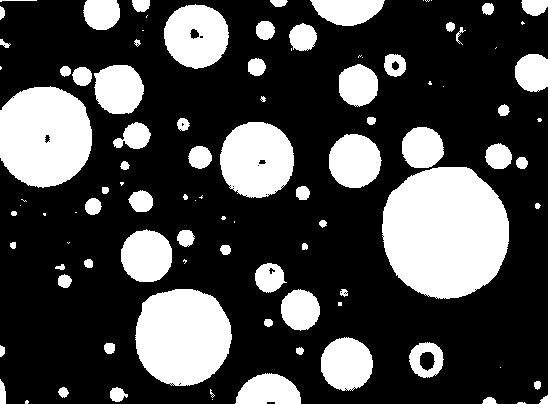

In [ ]:
# particles.bmp
img_dir_1 = os.path.join(img_dir, 'particles.bmp')

# Đọc ảnh
img_1 = cv.imread(img_dir_1, cv.IMREAD_GRAYSCALE)

# Gọi hàm globalThresholding
img_rst_1 = globalThresholding(img_1, thres=80)

# Hiển thị ảnh kết quả
cv2_imshow(img_rst_1)

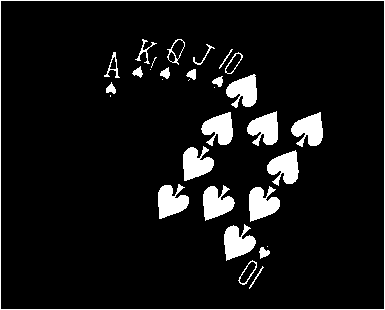

In [ ]:
# Phandoan01.jpg
img_dir_2 = os.path.join(img_dir, 'Phandoan01.jpg')

# Đọc ảnh
img_2 = cv.imread(img_dir_2, cv.IMREAD_GRAYSCALE)

# Gọi hàm globalThresholding
img_rst_2 = globalThresholding(img_2, 80)

# Hiển thị ảnh kết quả
cv2_imshow(img_rst_2)

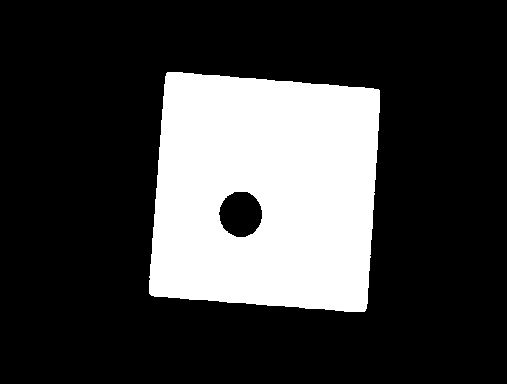

In [ ]:
# wdg2.jpg
img_dir_3 = os.path.join(img_dir, 'wdg2.jpg')

# Đọc ảnh
img_3 = cv.imread(img_dir_3, cv.IMREAD_GRAYSCALE)

# Gọi hàm globalThresholding
img_rst_3 = globalThresholding(img_3, thres=127)

# Hiển thị ảnh kết quả
cv2_imshow(img_rst_3)

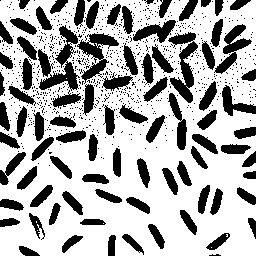

In [ ]:
# Rice.png
img_dir_4 = os.path.join(img_dir, 'rice.png')

# Đọc ảnh
img_4 = cv.imread(img_dir_4, cv.IMREAD_GRAYSCALE)

# Gọi hàm globalThresholding
img_rst_4 = globalThresholding(img_4, 117)

# Hiển thị ảnh kết quả
cv2_imshow(img_rst_4)

## Adaptive


nrow = 5 



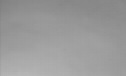

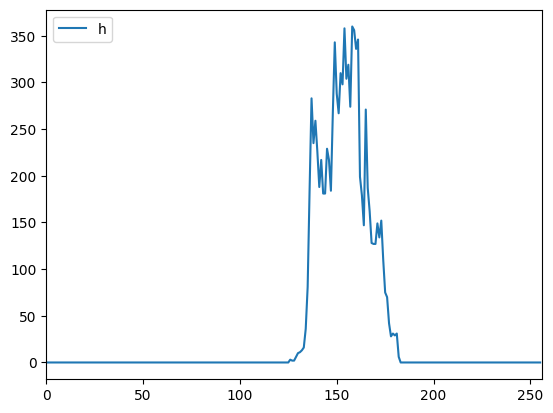


t = 154.17575187969925 



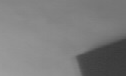

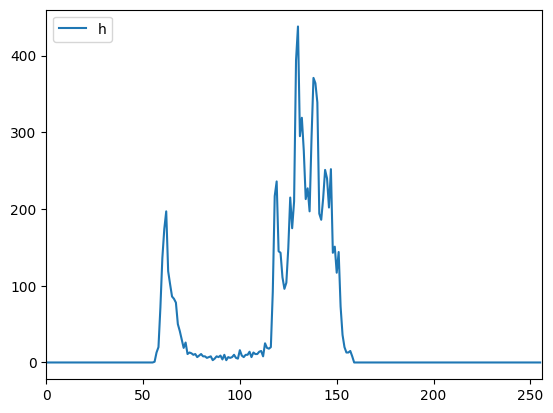


t = 123.91677109440268 



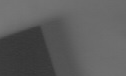

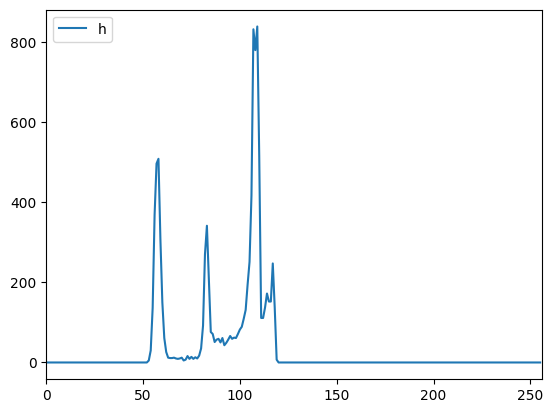


t = 92.76681286549707 



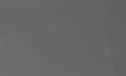

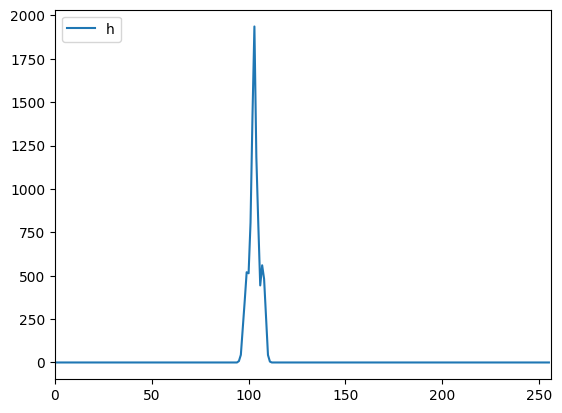


t = 103.07289055973267 



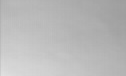

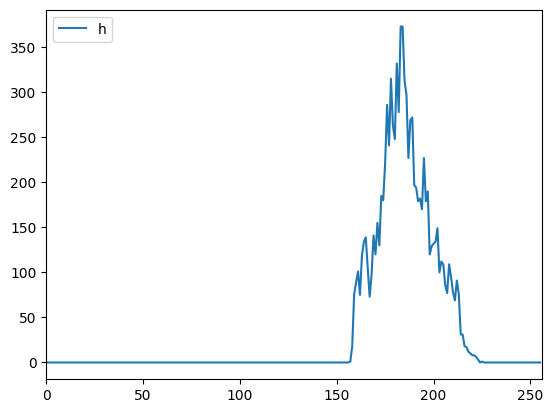


t = 185.390559732665 



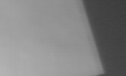

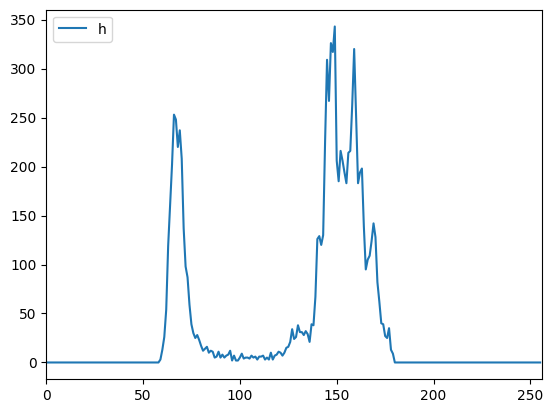


t = 131.3640350877193 



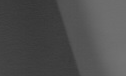

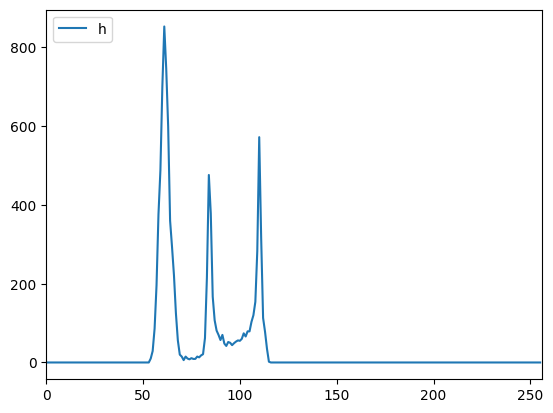


t = 78.02610693400167 



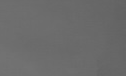

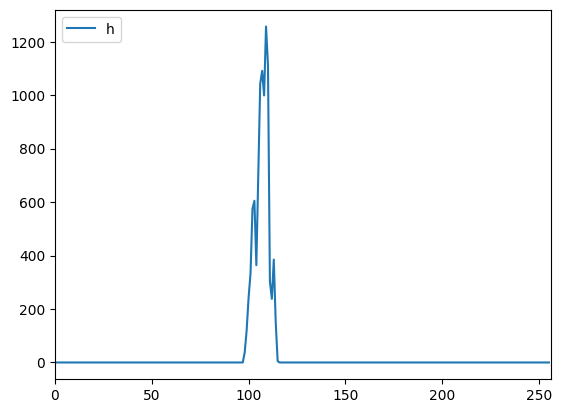


t = 106.87312030075188 



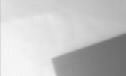

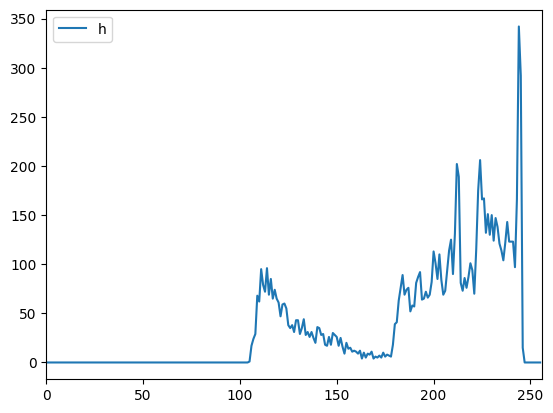


t = 197.281223893066 



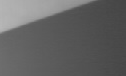

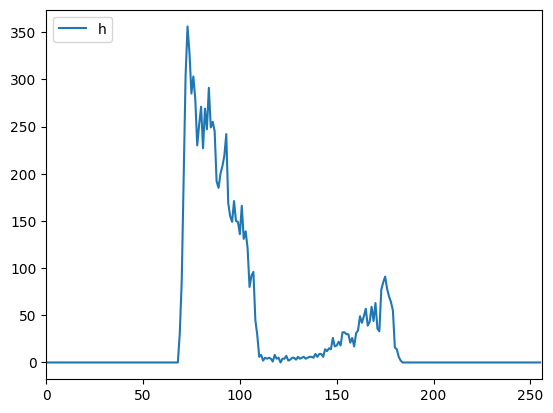


t = 99.09137426900585 



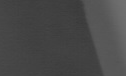

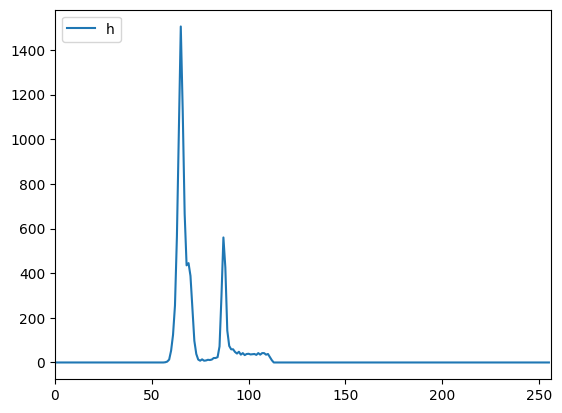


t = 72.68734335839599 



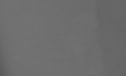

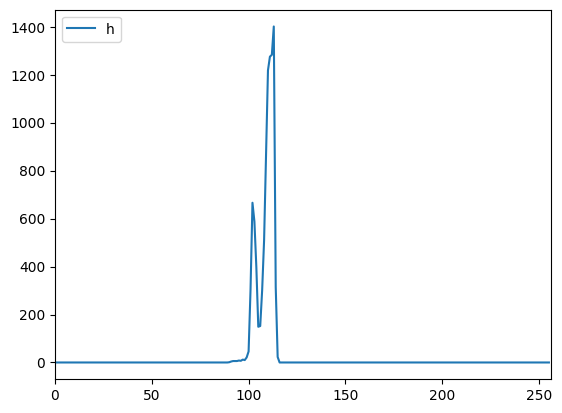


t = 108.86434837092732 



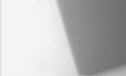

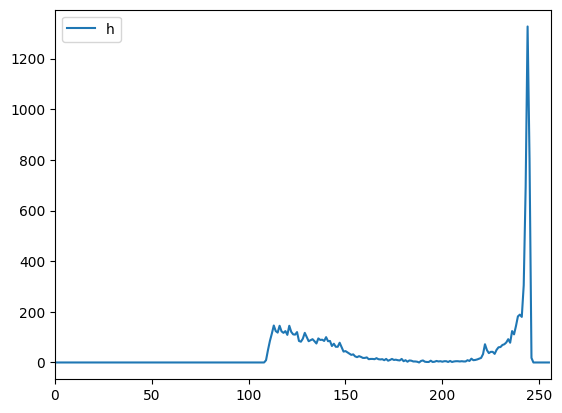


t = 189.531223893066 



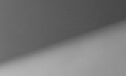

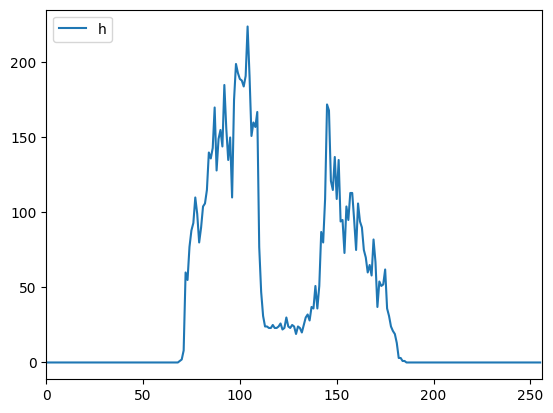


t = 118.19496658312448 



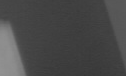

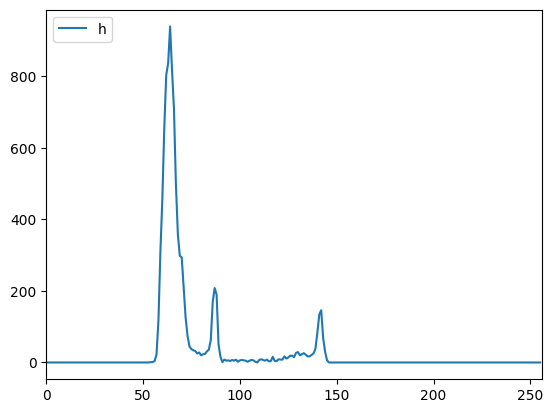


t = 73.66541353383458 



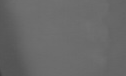

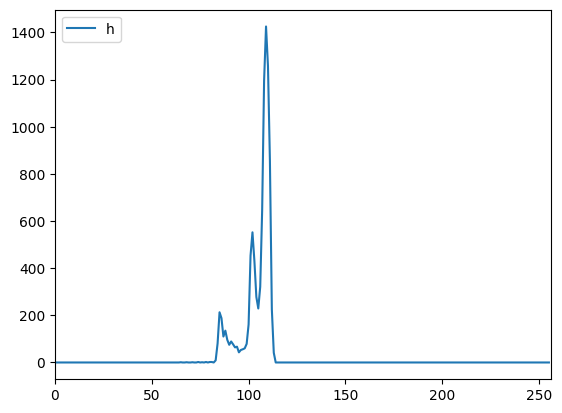


t = 104.56025480367586 



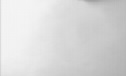

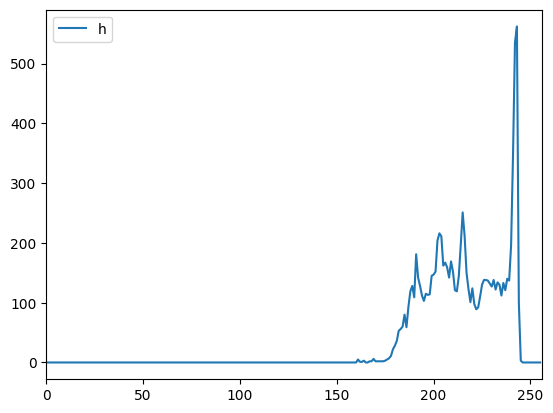


t = 216.55022974101922 



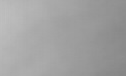

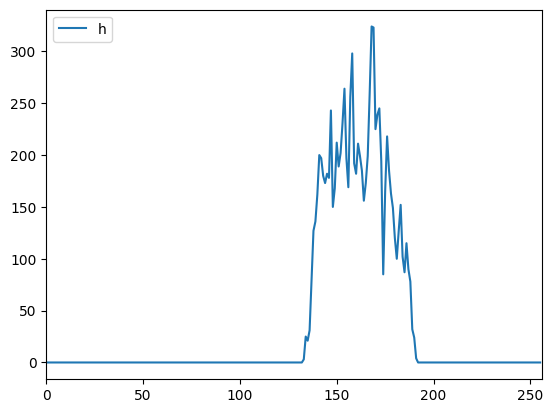


t = 161.31203007518798 



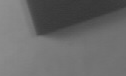

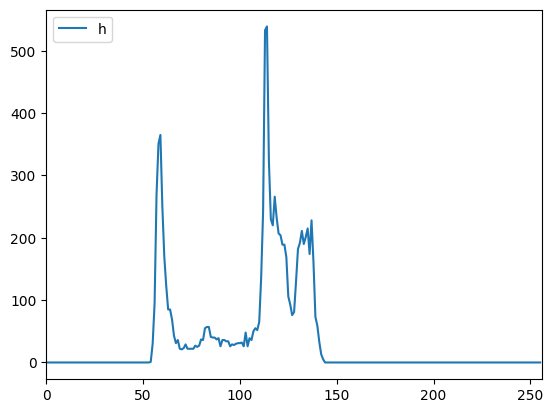


t = 105.04177109440268 



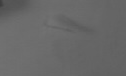

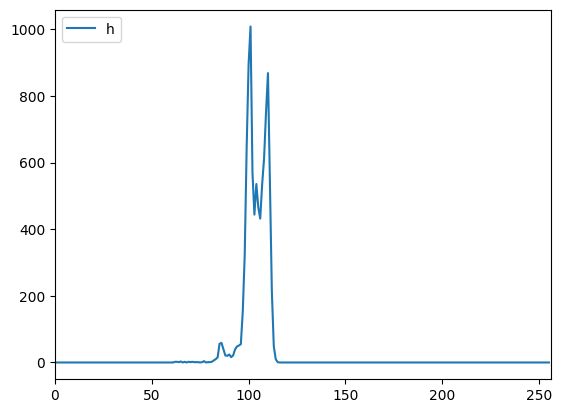


t = 103.83865914786968 



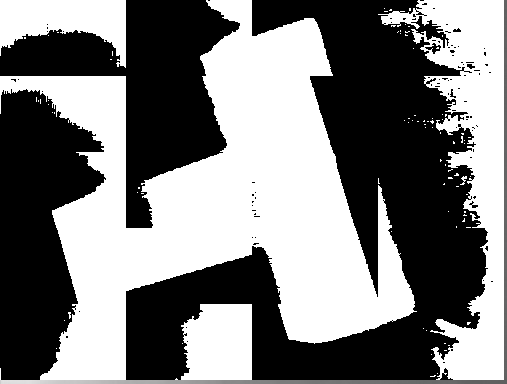

In [ ]:
# wdg3.jpg
img_dir_5 = os.path.join(img_dir, 'wdg3.jpg')

# Đọc ảnh
img_5 = cv.imread(img_dir_5, cv.IMREAD_GRAYSCALE)

nrow = random.randint(3, 6)

print ('\nnrow =',nrow,'\n')
# Gọi hàm adaptiveThresholding
img_rst_5 = adaptiveThresholding(img_5, nrow= nrow, ncol=4)  # Sử dụng giá trị nrow và ncol tùy ý

# Hiển thị ảnh kết quả
cv2_imshow(img_rst_5)

# Yêu cầu 2

In [ ]:
def Kmeans(img, n_clusters = 6):
 nrow, ncol,nchl = img.shape
 g = img.reshape(nrow*ncol,nchl)
 k_means = KMeans(n_clusters = n_clusters, n_init=10, random_state=0).fit(g)
 t = k_means.cluster_centers_[k_means.labels_]
 img_res = t.reshape(nrow, ncol, nchl)
 return img_res

In [ ]:
def Kmeans2(img, n_clusters = 6):
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape

  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)

  #k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=0).fit(g)
  k_means = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit(g)

  # t = k_means.cluster_centers_[k_means.labels_]

  arrcolor = np.random.rand(20,3) * 255
  t = arrcolor[k_means.labels_]

  img_res = img_tmp
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1

  return img_res


## (r,g,b)

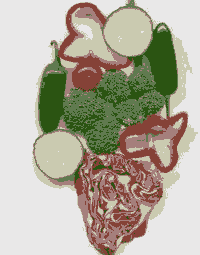

In [ ]:
img_dir_6 = os.path.join(img_dir, 'vegetables.jpg')

img_6 = cv.imread(img_dir_6)

img_res_1 = Kmeans(img_6, n_clusters = 6)

cv2_imshow(img_res_1)

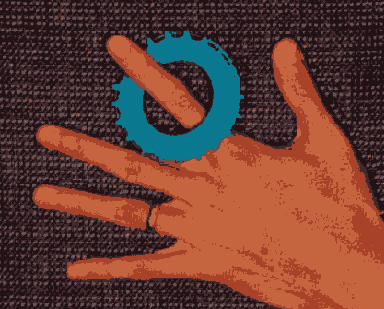

In [ ]:
img_dir_7 = os.path.join(img_dir, 'hand.jpg')

img_7 = cv.imread(img_dir_7)

img_res_2 = Kmeans(img_7, n_clusters = 6)

cv2_imshow(img_res_2)

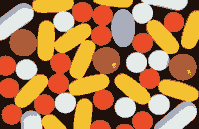

In [ ]:
img_dir_8 = os.path.join(img_dir, 'thuoc.jpg')

img_8 = cv.imread(img_dir_8)

img_res_3 = Kmeans(img_8, n_clusters = 6)

cv2_imshow(img_res_3)

## (r,g,b,x,y)

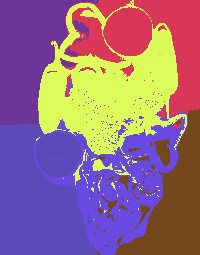

In [ ]:
img_res_4 = Kmeans2(img_6, n_clusters = 6)

cv2_imshow(img_res_4)

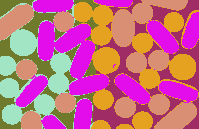

In [ ]:
img_res_5 = Kmeans2(img_8, n_clusters = 6)

cv2_imshow(img_res_5)